# Lecture 9 – Fall 2023


In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [186]:
# Load dataFrame of world bank
df=pd.read_csv(r'C:\\Users\\MOEED\Desktop\Knowledge Streams\Pandas\world_bank.csv')

df.columns

Index(['Unnamed: 0', 'Continent', 'Country',
       'Primary completion rate: Male: % of relevant age group: 2015',
       'Primary completion rate: Female: % of relevant age group: 2015',
       'Lower secondary completion rate: Male: % of relevant age group: 2015',
       'Lower secondary completion rate: Female: % of relevant age group: 2015',
       'Youth literacy rate: Male: % of ages 15-24: 2005-14',
       'Youth literacy rate: Female: % of ages 15-24: 2005-14',
       'Adult literacy rate: Male: % ages 15 and older: 2005-14',
       'Adult literacy rate: Female: % ages 15 and older: 2005-14',
       'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
       'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
       'Population: millions: 2016', 'Surface area: sq. km thousands: 2016',
       'Population density: people per sq. km: 2016',
       

# Diving into `displot`

Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.displot.html) for `sns.displot` lets you specify the `kind` of plot.

When plotting a histogram,  you can pass in `histplot` ([link](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)) parameters to `displot` to specify histogram-specific features.

For example, `stat=density` normalizes the histogram such that the area under the histogram is 1.

<Axes: xlabel='Gross national income per capita, Atlas method: $: 2016', ylabel='Density'>

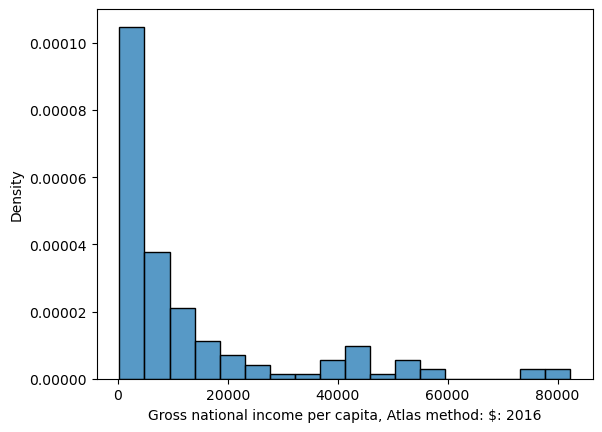

In [187]:
sns.histplot(df,x='Gross national income per capita, Atlas method: $: 2016',stat='density')

What does it mean to specify `kind=kde`? We will explore this!

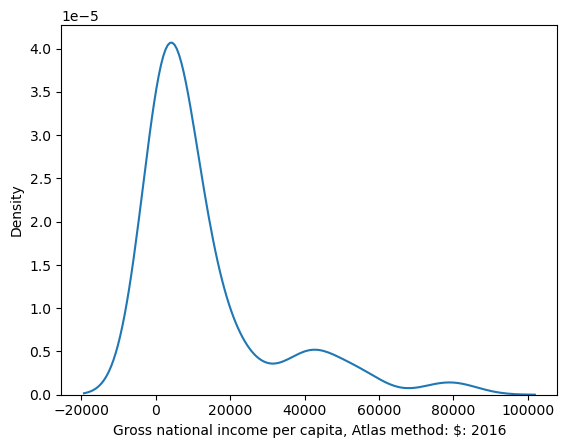

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="Gross national income per capita, Atlas method: $: 2016")
plt.show()


C:\Users\MOEED\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


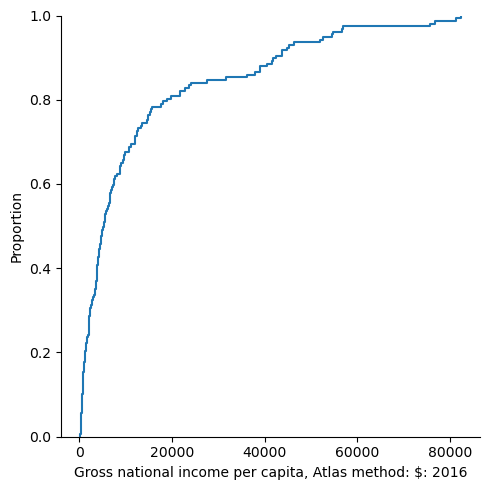

In [189]:
gni=df['Gross national income per capita, Atlas method: $: 2016']

sns.displot(x=gni, kind="ecdf")

## Scatter Plots

Scatter plots are used to visualize the **relationship** between two **quantitative continuous variables**.

You need to study the statistical assosiation of features

1: 'per capita: % growth: 2016'

2: 'Adult literacy rate: Female: % ages 15 and older: 2005-14'

<Axes: xlabel='per capita: % growth: 2016', ylabel='Adult literacy rate: Female: % ages 15 and older: 2005-14'>

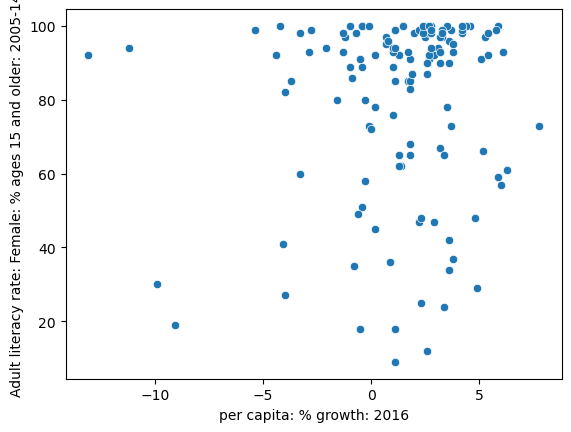

In [190]:
sns.scatterplot(df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14')

<Axes: xlabel='per capita: % growth: 2016', ylabel='Adult literacy rate: Female: % ages 15 and older: 2005-14'>

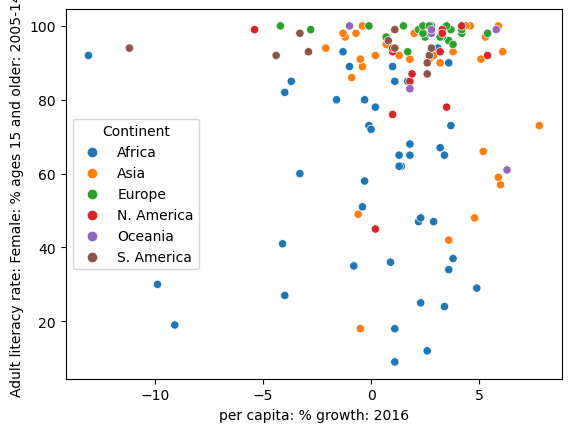

In [191]:
# Now use 'Continents' as hue parameter in scatterplot.
sns.scatterplot(df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14', hue='Continent')

The plots above suffer from **overplotting** – many scatter points are stacked on top of one another (particularly in the upper right region of the plot).

**Jittering** is a processed used to address overplotting. A small amount of random noise is added to the x and y values of all datapoints.

Decreasing the size of each scatter point using the `s` parameter of `plt.scatter` also helps.

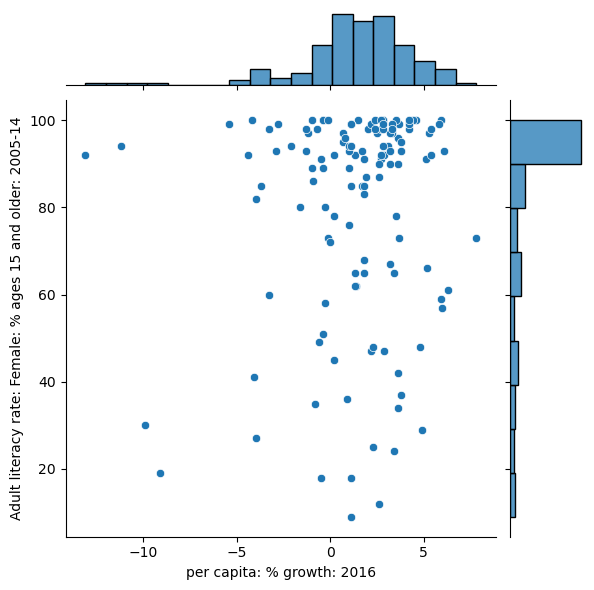

In [192]:
sns.jointplot(df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14')

## Hex Plots

Rather than plot individual datapoints, plot the *density* of how datapoints are distributed in 2D. A darker hexagon means that more datapoints lie in that region.

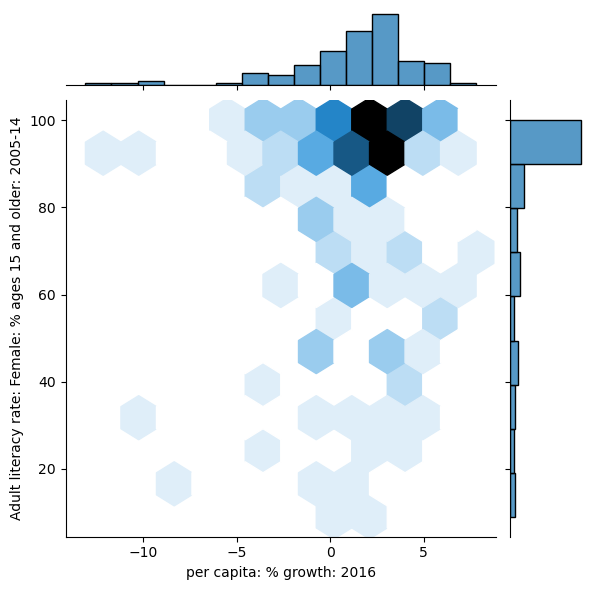

In [193]:
sns.jointplot(df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14',kind='hex')

## Contour Plots

Contour plots are similar to topographic maps. Contour lines of the same color have the same *density* of datapoints. The region with the darkest color contains the most datapoints of all regions.We can think of a contour plot as the 2D equivalent of a KDE curve.

<Axes: xlabel='per capita: % growth: 2016', ylabel='Adult literacy rate: Female: % ages 15 and older: 2005-14'>

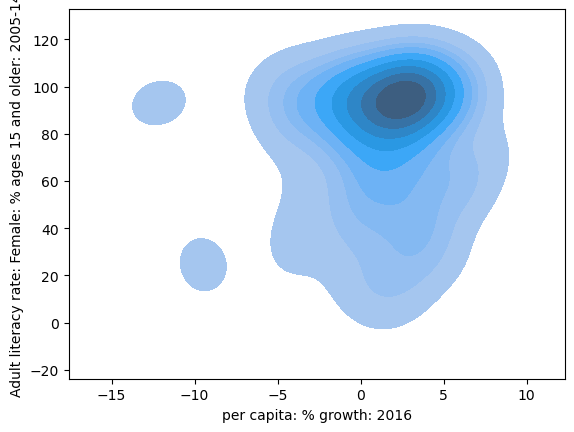

In [194]:
sns.kdeplot(df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14',fill=True)

<Axes: xlabel='per capita: % growth: 2016', ylabel='Adult literacy rate: Female: % ages 15 and older: 2005-14'>

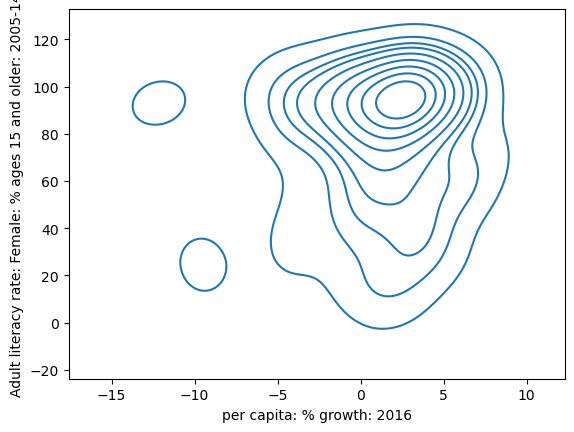

In [195]:
# code here
sns.kdeplot(df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14',fill=False,)

C:\Users\MOEED\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


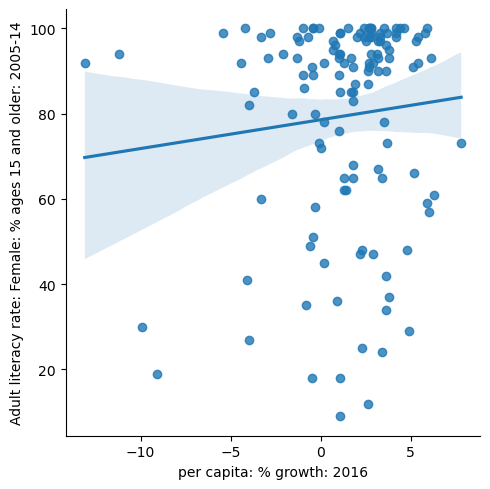

In [196]:
sns.lmplot(data=df,x='per capita: % growth: 2016',y='Adult literacy rate: Female: % ages 15 and older: 2005-14')

## Transformations

Often, our reason for visualizing relationships like we did above is beause we then want to *model* these relationships. We will start talking about the theory and math underlying modeling processes next week.

We will focus a lot on **linear modeling** in Data 100. This means that it is often helpful to transform and **linearize** our data such that it shows roughly a linear relationship. There are a few reasons for this:
* Transforming data makes visualizations easier to interpret
* Linear relationships are straightforward to understand – we have ideas of what slopes and intercepts mean
* Later on in the course, the ability to linearize data will help us make more effective models


In [212]:
log_gni=df.dropna(subset=['log_gni'], inplace=True)
adult_ltr=df.dropna(subset=['adult_ltr'], inplace=True)

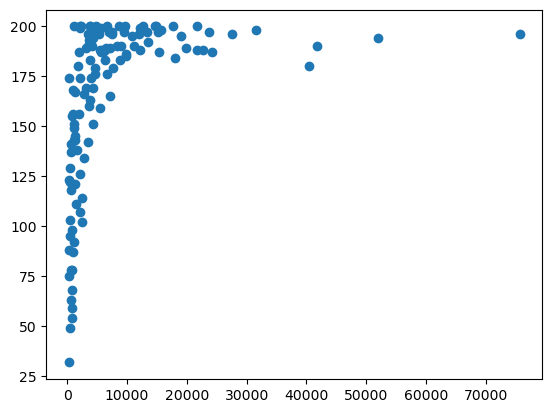

In [210]:
df['adult_ltr']=df['Adult literacy rate: Male: % ages 15 and older: 2005-14']+df['Adult literacy rate: Female: % ages 15 and older: 2005-14']
adlr=df['adult_ltr']
growww = df['Gross national income per capita, Atlas method: $: 2016']
plt.scatter(growww,adlr )
# plt.xlabel('Gross national income per capita')
# plt.ylabel('Adult Literacy Rate')
plt.show()

What is making this plot non-linear?
* There are a few extremely large values for gross national income that are distoring the horizontal scale of the plot. If we rescaled the x-values such that these large values become proportionally smaller, the plot would be more linear
* There are too many large values of adult literacy rate all clumped together at the top of the plot. If we rescaled the y-axis such that large values of y are more spread out, the plot would be more linear

First, we can transform the x-values such that very large values of x become smaller. This can be achieved by performing a **log transformation** of the gross national income data. When we take the logarithm of a large number, this number becomes proportionally much smaller relative to its original value. When we take the log of a small number, the number does not change very significantly relative to its starting value.

In [205]:
df['log_gni'] = np.log(df['Gross national income per capita, Atlas method: $: 2016'])
df[['log_gni']]

,log_gni
0,8.359369
1,8.143227
2,6.709304
3,8.796339
4,5.634790
...,...
161,8.354674
162,8.311398
163,8.691146
164,8.863616


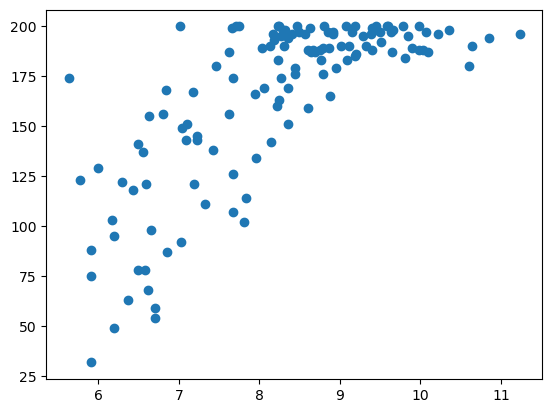

In [159]:
df['adult ltr']=df['Adult literacy rate: Male: % ages 15 and older: 2005-14']+df['Adult literacy rate: Female: % ages 15 and older: 2005-14']
adlr=df['adult ltr']
# growww = df['Gross national income per capita, Atlas method: $: 2016']
plt.scatter(log_gni,adlr )
# plt.xlabel('Gross national income per capita')
# plt.ylabel('Adult Literacy Rate')
plt.show()

Already, the relationship is starting to look more linear! Now, we'll address the vertical scaling.

To reduce the clumping of datapoints near the top of the plot, we want to spread out large values of y without substantially changing small values of y. We can do this by applying a **power transformation** – that is, by raising the y-values to a power. Below, we raise all y-values to the power of 4.

In [160]:
adlr=adlr**4

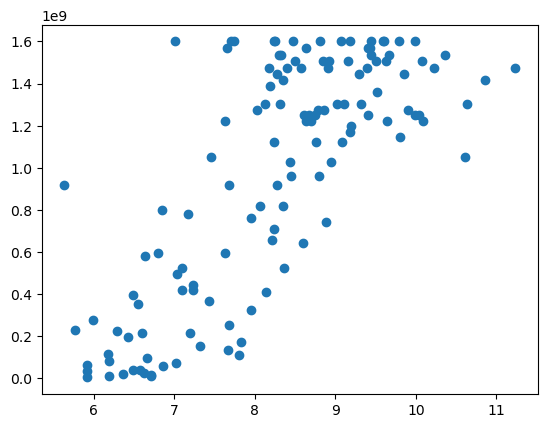

In [161]:
plt.scatter(log_gni,adlr )
plt.show()

Our transformed variables now seem to follow a linear relationship!

$$y^4 = m(\log{x}) + b$$

We can use this fact to uncover new information about the original, untransformed variables.

$$y = [m(\log{x}) + b]^{1/4}$$

In the cell below, we first fit a regression line to the transformed data to find values for the slope ($m$) and intercept ($b$). Then, we plug these values into the relationship we derived for the *untransformed* variables. We find a mathematical relationship relating the gross national income and the adult literacy rate.

The slope, m, of the transformed data is: 336400693.43172705
The intercept, b, of the transformed data is: -1802204836.0479987


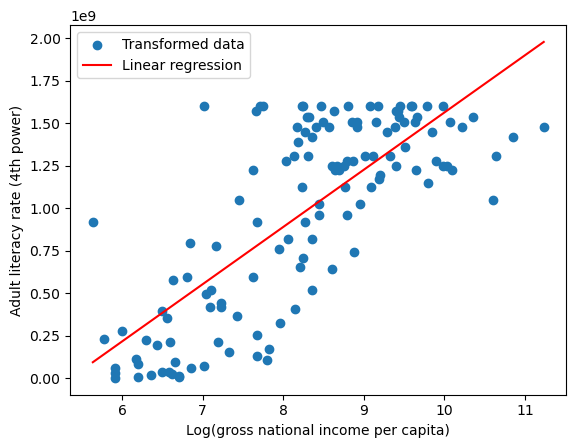

In [ ]:
# The code below fits a linear regression model. We'll discuss it at length in a future lecture
from sklearn.linear_model import LinearRegression
# code here

In [165]:
# The code below fits a linear regression model. We'll discuss it at length in a future lecture
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
# code here
lr = LinearRegression()
slope = lr.coef_[0]
intercept = lr.intercept_

print(slope, intercept)

plt.scatter(X, Y, label='Original Data')
# Plot the linear regression line
plt.plot(X, lr.predict(x_imputed), color='red', label='Linear Regression Line')
# Add labels and legend
plt.title('Linear Regression')
plt.xlabel('Gross National Income Per Capita')
plt.ylabel('Adult Literacy Rate (4th Power)')
plt.legend()

# Show the plot
plt.show()


ValueError: could not convert string to float: 'Africa'

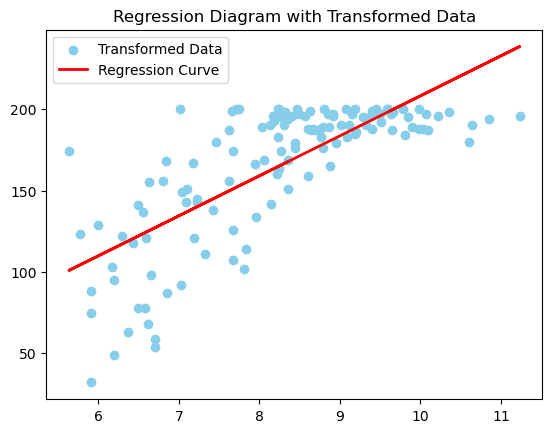

In [232]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
# adlr= adlr.values.reshape(-1, 1)
# log_gni = log_gni.values.reshape(-1, 1)
Y=df['adult_ltr']
X=df['log_gni'].values.reshape(-1, 1)
lr.fit(X,Y)
slope = lr.coef_[0] 
intercept = lr.intercept_
plt.scatter(X, Y, color='skyblue', label='Transformed Data')
plt.plot(X, lr.predict(X), color='red', linewidth=2, label='Regression Curve')
plt.title('Regression Diagram with Transformed Data')
# plt.xlabel('log_gni')
# plt.ylabel('Adult literacy rate(4th power)')
plt.legend()
plt.show()

The slope, m, of the transformed data is: 24.590948553723347
The intercept, b, of the transformed data is: -37.710567332050175


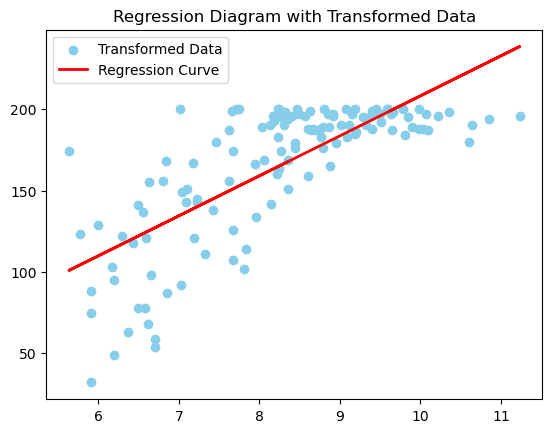

In [225]:
import numpy as np
from sklearn.linear_model import LinearRegression
y_imputer = SimpleImputer(strategy='mean')
Y_imputed = y_imputer.fit_transform(Y.values.reshape(-1, 1))

x_imputer = SimpleImputer(strategy='mean')
X_imputed = x_imputer.fit_transform(X)

lr = LinearRegression()
lr.fit(X_imputed, Y_imputed)

slope = lr.coef_[0] 
intercept = lr.intercept_

print("The slope, m, of the transformed data is:", slope[0])
print("The intercept, b, of the transformed data is:", intercept[0])

plt.scatter(X_imputed, Y_imputed, color='skyblue', label='Transformed Data')
plt.plot(X_imputed, lr.predict(X_imputed), color='red', linewidth=2, label='Regression Curve')

plt.title('Regression Diagram with Transformed Data')
# plt.xlabel('log_gni')
# plt.ylabel('Adult literacy rate(4th power)')
plt.legend()
plt.show()

The slope, m, of the transformed data is: 24.590948553723347
The intercept, b, of the transformed data is: -37.710567332050175


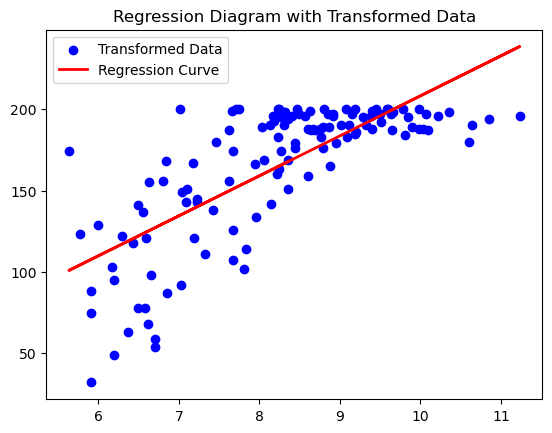

In [236]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df['log_gni'].values.reshape(-1, 1)  # Reshape to a 2D array
Y=df['adult_ltr'].values.reshape(-1, 1)  # Reshape Y as well

# Droping rows with missing values
df_clean = df[['log_gni', 'adult_ltr']].dropna()

X_clean = df_clean['log_gni'].values.reshape(-1, 1)
Y_clean = df_clean['adult_ltr'].values.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_clean, Y_clean)

slope = lr.coef_[0] 
intercept = lr.intercept_

print("The slope, m, of the transformed data is:", slope[0])
print("The intercept, b, of the transformed data is:", intercept[0])

plt.scatter(X_clean, Y_clean, color='blue', label='Transformed Data')
plt.plot(X_clean, lr.predict(X_clean), color='red', linewidth=2, label='Regression Curve')

plt.title('Regression Diagram with Transformed Data')
# plt.xlabel('log_gni')
# plt.ylabel('Adult literacy rate(4th power)')
plt.legend()
plt.show()

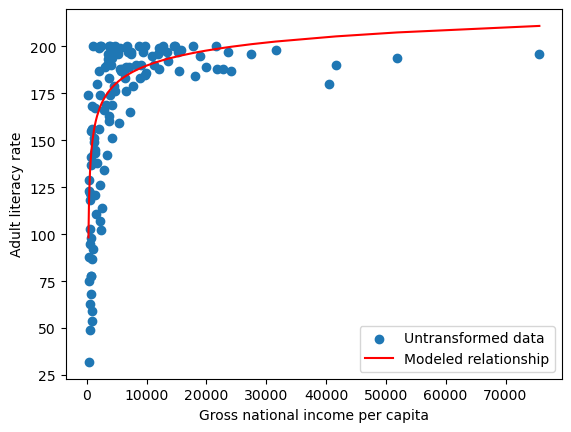

In [ ]:
# Now, plug the values for m and b into the relationship between the untransformed x and y
# code here


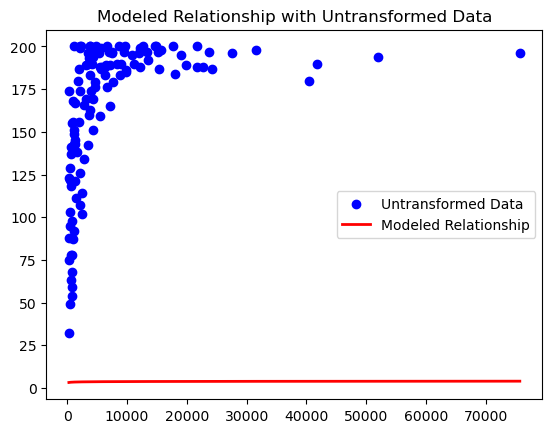

In [239]:
import numpy as np
import matplotlib.pyplot as plt

X_untransformed = df['Gross national income per capita, Atlas method: $: 2016'].values.reshape(-1, 1)  

sorted_indices = np.argsort(X_untransformed.flatten())
X_sorted = X_untransformed[sorted_indices]

Y_untransformed_modeled = (slope[0] * np.log(X_sorted) + intercept[0])**(1/4)


plt.scatter(X_untransformed, df['adult_ltr'], color='blue', label='Untransformed Data')
plt.plot(X_sorted, Y_untransformed_modeled, color='red', linewidth=2, label='Modeled Relationship')

plt.title('Modeled Relationship with Untransformed Data')
# plt.xlabel('Gross national income per capita, Atlas method: $: 2016') 
# plt.ylabel('Adult literacy rate') 
plt.legend()
plt.show()


We've been able to find a fairly close approximation for the relationship between the original variables!

<br/>

---

# Scale

In [240]:
ppdf = pd.DataFrame(dict(Cancer=[2007371, 935573], Abortion=[289750, 327000]),
                    index=pd.Series([2006, 2013],
                    name="Year"))
ppdf

,Cancer,Abortion
Year,,
2006,2007371,289750
2013,935573,327000


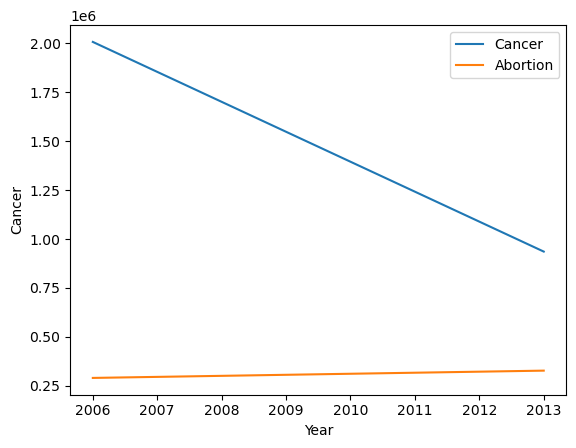

In [241]:
# code here
# code here
sns.lineplot(data=ppdf, x='Year', y='Cancer', label='Cancer')
sns.lineplot(data=ppdf, x='Year', y='Abortion', label='Abortion')
plt.legend()

Let's now compute the relative change between the two years...

In [245]:
# code here
percentchange = (ppdf.pct_change() * 100).iloc[-1]
print(percentchange)

Cancer     -53.39312
Abortion    12.85591
Name: 2013, dtype: float64


Text(0.5, 1.0, 'Percent Change in Number of Procedures')

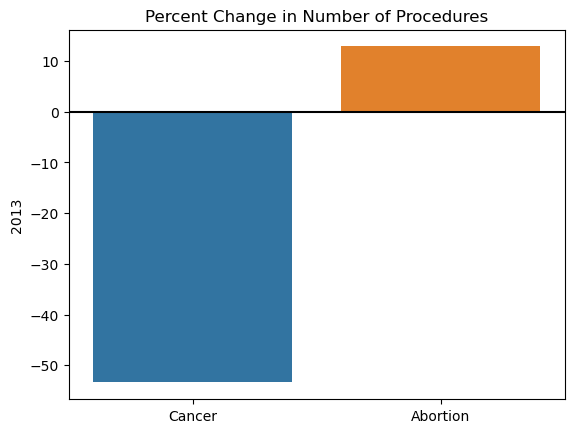

In [246]:
ax = sns.barplot(x=percentchange.index, y=percent_change)
ax.axhline(0, color='black')
ax.set_title("Percent Change in Number of Procedures")

## Current Population Survey

In [248]:
cps = pd.read_csv("income.csv")
cps

,ID,Income,Age,Education,Gender
0,1,113,69,12,1
1,2,91,52,18,0
2,3,121,65,14,0
3,4,81,58,12,0
4,5,68,31,16,1
...,...,...,...,...,...
1495,1496,84,50,16,0
1496,1497,81,40,16,0
1497,1498,62,30,16,1
1498,1499,99,67,16,0


In [250]:
cps['Education'].unique()

array([12, 18, 14, 16, 15, 13, 11, 19, 20, 17, 10], dtype=int64)

In [251]:
cps.drop(columns=['Age','ID'], inplace=True)
cps.head(2)

,Income,Education,Gender
0,113,12,1
1,91,18,0


In [252]:
cps = cps.replace({'Education':{10:"<HS", 11:"<HS", 12:"HS", 13:"<BA", 14:"<BA", 15:"<BA", 16:"BA", 17:"<MA", 18:"MA", 19:">MA", 20:">MA"}})
cps

,Income,Education,Gender
0,113,HS,1
1,91,MA,0
2,121,<BA,0
3,81,HS,0
4,68,BA,1
...,...,...,...
1495,84,BA,0
1496,81,BA,0
1497,62,BA,1
1498,99,BA,0


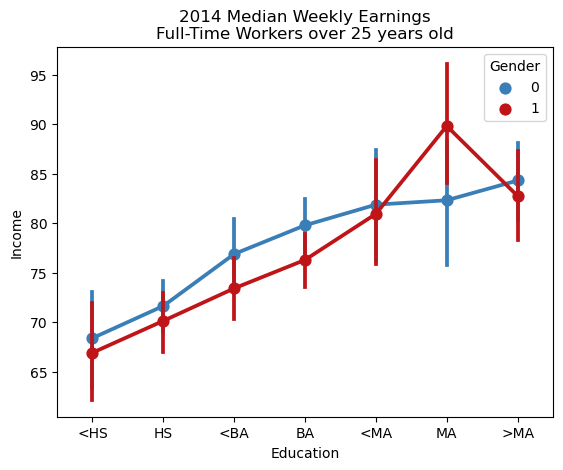

In [254]:
education_order = ["<HS", "HS", "<BA", "BA", "<MA", 'MA', '>MA']
blue_red = ["#397eb7", "#bf1518"]

with sns.color_palette(sns.color_palette(blue_red)):
    ax = sns.pointplot(data=cps, x="Education", y="Income", hue="Gender", order=education_order)

ax.set_title("2014 Median Weekly Earnings\nFull-Time Workers over 25 years old");


Now, let's compute the income gap as a relative quantity between men and women. Recall that the structure of the dataframe is as follows:

In [256]:
cps.head()
cps.replace({'Gender': {1: 'M', 0: 'F'}}, inplace=True)
cps.head()

,Income,Education,Gender
0,113,HS,M
1,91,MA,F
2,121,<BA,F
3,81,HS,F
4,68,BA,M


This calls for using `groupby` by Gender, so that we can separate the data for both genders, and then compute the ratio:

In [257]:
# code here
result = cps.groupby(['Education', 'Gender'])['Income'].mean().unstack()
result['Income Ratio (M/F)'] = result['M'] / result['F']
result

Gender,F,M,Income Ratio (M/F)
Education,,,
<BA,76.886957,73.420635,0.954917
<HS,68.394737,66.921875,0.978465
<MA,81.870370,80.938776,0.988621
>MA,84.309524,82.742857,0.981418
BA,79.785714,76.294118,0.956238
HS,71.640394,70.135870,0.978999
MA,82.313725,89.815789,1.091140


<Axes: xlabel='Education', ylabel='Income Ratio (M/F)'>

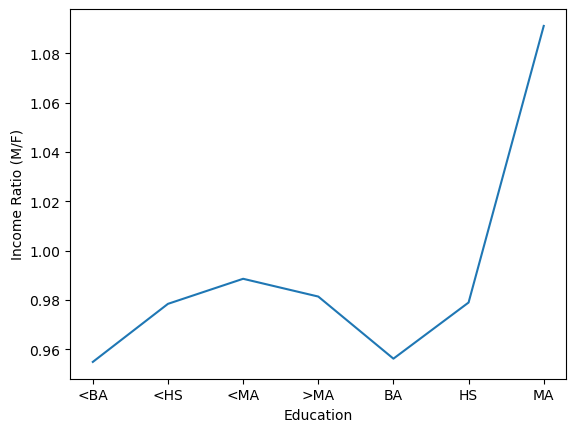

In [258]:
# code here
sns.lineplot(result, x='Education', y='Income Ratio (M/F)')

Let's now compute the alternate ratio, F/M instead:

In [262]:
# code here
result = cps.groupby(['Education', 'Gender'])['Income'].mean().unstack()
result['Income Ratio (M/F)'] = result['F'] / result['M']
result

Gender,F,M,Income Ratio (M/F)
Education,,,
<BA,76.886957,73.420635,1.047212
<HS,68.394737,66.921875,1.022009
<MA,81.870370,80.938776,1.011510
>MA,84.309524,82.742857,1.018934
BA,79.785714,76.294118,1.045765
HS,71.640394,70.135870,1.021452
MA,82.313725,89.815789,0.916473


<Axes: xlabel='Education', ylabel='Income Ratio (M/F)'>

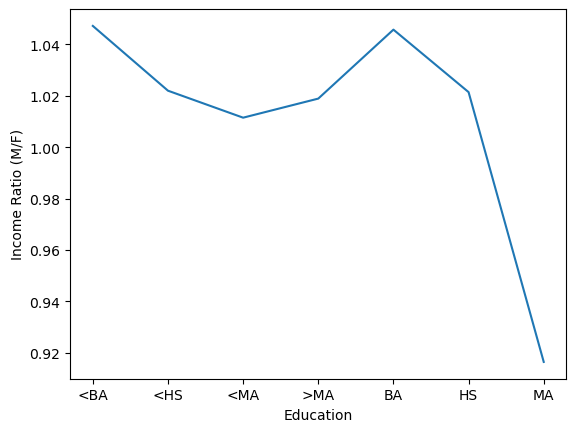

In [263]:
# code here
sns.lineplot(result, x='Education', y='Income Ratio (M/F)')

## CO2 Emissions

In [264]:
co2 = pd.read_csv("CAITcountryCO2.csv", skiprows = 2,
                  names = ["Country", "Year", "CO2"], encoding = "ISO-8859-1")
co2.tail()

,Country,Year,CO2
31840,Vietnam,2014,174.5552
31841,World,2014,34701.3739
31842,Yemen,2014,24.2678
31843,Zambia,2014,4.2855
31844,Zimbabwe,2014,12.1385


In [265]:
last_year = co2.Year.iloc[-1]
last_year

2014

In [266]:
# code here
df1 = co2.query('Country == "China" or Country == "United States" or Country == "European Union (28)" or Country == "India" or Country == "Russian Federation" or Country == "Japan" or Country == "Germany" or Country == "Korea, Rep. (South)" or Country=="Iran" or Country=="Canada" or Country=="Saudi Arabia" or Country=="Brazil" or Country=="United Kingdom" or Country=="Mexico"')
df1.head()


,Country,Year,CO2
23,Brazil,1850,NaN
30,Canada,1850,0.0586
35,China,1850,NaN
58,European Union (28),1850,176.7939
65,Germany,1850,15.1396


<Axes: xlabel='Year', ylabel='CO2'>

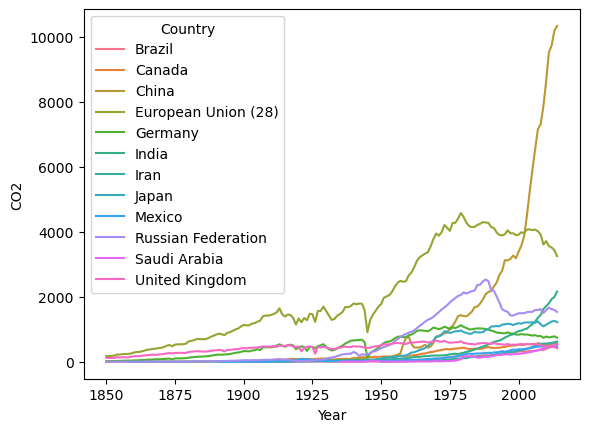

In [267]:
sns.lineplot(df1, x='Year', y='CO2', hue='Country')

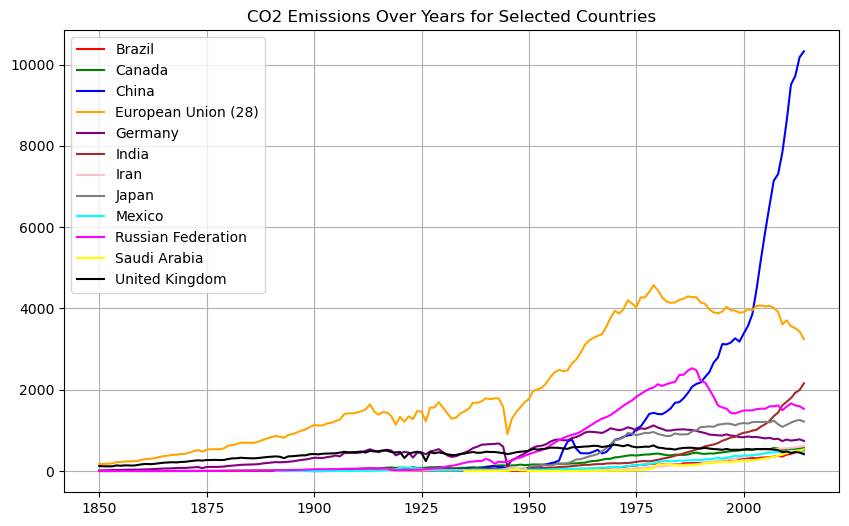

In [269]:
# code here
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# Assuming df1 is your DataFrame
df1 = df1.dropna()  

# Define a cycler for colors
colors = cycler('color', ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'black'])

# Apply the cycler to the Matplotlib rcParams
plt.rcParams['axes.prop_cycle'] = colors

# Plot the data for each country
plt.figure(figsize=(10, 6))
for country, data in df1.groupby('Country'):
    plt.plot(data['Year'], data['CO2'], label=country)

# Show legend, title, and labels
plt.legend()
plt.title('CO2 Emissions Over Years for Selected Countries')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (units)')
plt.grid(True)

# Display the plot
plt.show()
